# Continued from Part 2...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

sns.set_style("white")

## Read Data

In [2]:
df = pd.read_csv('detect cardiovascular-cleaned 2.csv')
df

,age,ap_hi,ap_lo,cholesterol,gluc,active,cardio,bmi
0,61,130,80,2,2,1,0,28.7
1,40,110,70,1,1,1,1,26.7
2,60,120,80,1,1,1,0,25.7
3,39,120,80,1,1,1,0,31.2
4,64,120,80,1,1,1,0,25.8
...,...,...,...,...,...,...,...,...
68256,52,120,80,1,1,1,0,26.9
68257,61,140,90,2,2,1,1,50.5
68258,52,180,90,3,1,0,1,31.4
68259,61,135,80,1,2,0,1,27.1


### Features:
1.	Age | Objective Feature | age | int (days)
2.	Height | Objective Feature | height | int (cm) |
3.	Weight | Objective Feature | weight | float (kg) |
4.	Gender | Objective Feature | gender | categorical code |
5.	Systolic blood pressure | Examination Feature | ap_hi | int |
6.	Diastolic blood pressure | Examination Feature | ap_lo | int |
7.	Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8.	Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9.	Smoking | Subjective Feature | smoke | binary |
10.	Alcohol intake | Subjective Feature | alco | binary |
11.	Physical activity | Subjective Feature | active | binary |
12.	Presence or absence of cardiovascular disease | Target Variable | cardio | binary | (TARGET)

## Creating Model 
<br>
We can use sklearn library or we can write functions ourselves. Let's them both. Firstly we will write our functions after that we'll use sklearn library to calculate score.

In [3]:
# Reading the Data and Performing Basic Data Checks
print(df.shape)
df.describe()

(68261, 8)


,age,ap_hi,ap_lo,cholesterol,gluc,active,cardio,bmi
count,68261.000000,68261.000000,68261.000000,68261.000000,68261.000000,68261.000000,68261.000000,68261.000000
mean,52.828789,126.290239,81.331068,1.364498,1.225956,0.803548,0.494909,27.463916
std,6.767836,17.887949,9.883714,0.678776,0.571888,0.397317,0.499978,5.284978
min,39.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,3.500000
25%,48.000000,120.000000,80.000000,1.000000,1.000000,1.000000,0.000000,23.900000
50%,53.000000,120.000000,80.000000,1.000000,1.000000,1.000000,0.000000,26.300000
75%,58.000000,140.000000,90.000000,1.000000,1.000000,1.000000,1.000000,30.100000
max,64.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,86.800000


In [4]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True)

In [5]:
# Creating the Training and Test Datasets
target_column = ['cardio']
predictors = list(set(list(df.columns))-set(target_column))

X = df[predictors].values
y = df[target_column].values
y = np.ravel(y,order = 'C')

We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9)
print(X_train.shape); print(X_test.shape)
print(y_train.shape); print(y_test.shape)

(54608, 7)
(13653, 7)
(54608,)
(13653,)


## Random Forest Classification

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#putting in the best parameters from RandomizedSearchCV (part 2) to train our model
rf = RandomForestClassifier(n_estimators=1000, min_samples_split=5, min_samples_leaf=1,
                            max_features='log2', max_depth=10,criterion='entropy',bootstrap=True)

cross_val_score(rf, X, y, cv=5, scoring='accuracy')

print("Random Forest Algorithm Accuracy Score : {:.2f}%".
      format(100*np.mean(cross_val_score(rf, X, y, cv=5, scoring='accuracy'))))

Random Forest Algorithm Accuracy Score : 73.51%


### Confusion Matrix

In [8]:
from sklearn.model_selection import cross_val_predict
clf=rf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [9]:
# print the first 25 true and predicted responses
print('True', y_test[0:25])
print('Pred', y_pred[0:25])

True [1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1]
Pred [1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1]


In [10]:
from sklearn import metrics

In [11]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[5436 1453]
 [2210 4554]]


### Basic terminology

0: negative class
1: positive class

True positive (TP): Prediction is +ve and X has CV diseases, we want that

True negative (TN): Prediction is -ve and X is healthy, we want that too

False positive (FP): Prediction is +ve and X is healthy, false alarm, bad

False negative (FN): Prediction is -ve and X has CV diseases, the worst


#### Which metrics should you focus on?
Choice of metric depends on your business objective
- Identify if FP or FN is more important to reduce

Choose metric with relevant variable (FP or FN in the equation)

Detection of CV filter (positive class is "detection of CV"):
Optimize for precision or specificity
- precision: false negative as variable
- specificity: false negative as variable

In this study, false positives are just a false alarm. With a 2nd more detailed scan it’ll be corrected. But a false negative label, this means that they think they’re healthy when they’re not, which is — in our problem — the worst case of the 4.

### <font color="magenta"> Choose Recall (aka Sensitivity)
If the idea of false positives is far better than false negatives, in other words, if the occurrence of false negatives is unaccepted/intolerable, that you’d rather get some extra false positives(false alarms) over saving some false negatives. 

You’d rather get some healthy people labeled with CV diseaseas over leaving a person with CV disease labeled healthy.

Let's aim to get FN < FP.

#### Adjusting Classification Threshold

In [12]:
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(model, threshold=0.5):
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    detect_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(detect_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['hit', 'miss'],
           yticklabels=['hit', 'miss']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

In [13]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(rf, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [14]:
y_predict = rf.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.7581,   Recall: 0.6733


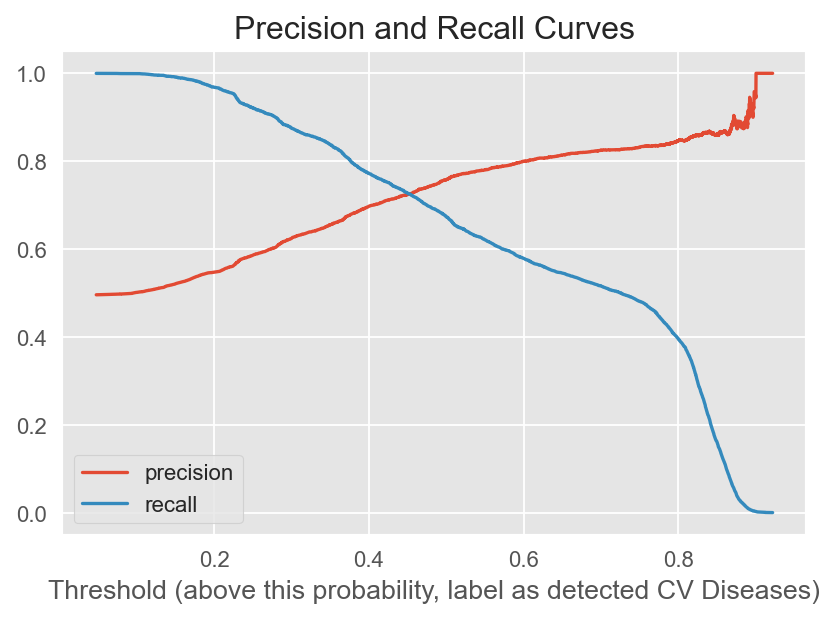

In [15]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as detected CV Diseases)');
plt.title('Precision and Recall Curves');

In [31]:
y_predict = (rf.predict_proba(X_test)[:,1] > 0.44)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.7200,   Recall: 0.7368


#### ROC Curve & AUC 
ROC : Receiver Operating Characteristic 

AUC: Percentage of the ROC plot that is underneath the curve (Area under Curve)

In [17]:
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1]) 

ROC AUC score =  0.7962236826439084


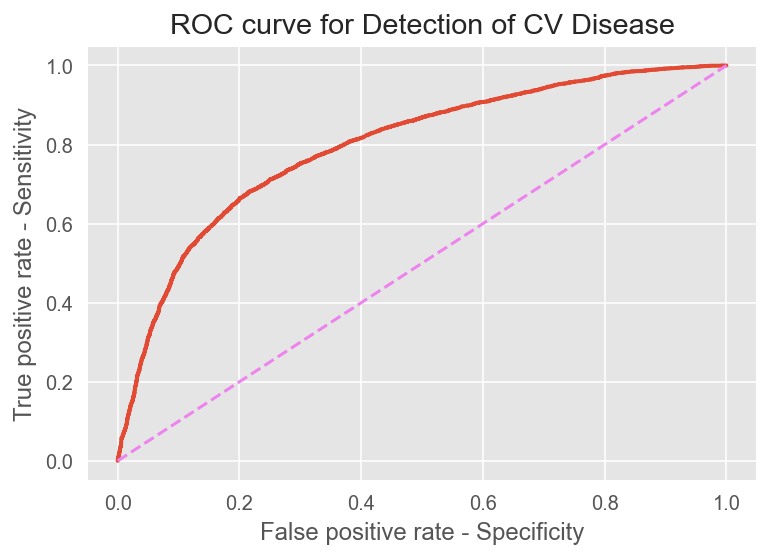

In [18]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate - Specificity')
plt.ylabel('True positive rate - Sensitivity')
plt.title('ROC curve for Detection of CV Disease');
print("ROC AUC score = ", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

In [19]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [20]:
evaluate_threshold(0.5)

Sensitivity: 0.6729745712596097
Specificity: 0.7890840470314995


In [30]:
evaluate_threshold(0.44)

Sensitivity: 0.7368421052631579
Specificity: 0.7186819567426332


In [22]:
#Log loss
from sklearn.metrics import log_loss

ll=log_loss(y_test, rf.predict_proba(X_test))
print("Log-loss on rf: {:.4f}".format(log_loss(y_test, rf.predict_proba(X_test))))

Log-loss on rf: 0.5469


In [23]:
#F1 score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

rf_f1_score = f1_score(y_test,rf.predict(X_test))
print("F1 score on rf: {:.3f}".format(f1_score(y_test,rf.predict(X_test))))

F1 score on rf: 0.713


In [24]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import log_loss

dc = DummyClassifier()
dc.fit(X_train, y_train)
print("Log-loss on dummy classifier: {:6.4f}".format(log_loss(y_test, dc.predict_proba(X_test)))) 

Log-loss on dummy classifier: 17.3263


C:\Users\HP\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


In [25]:
print("RF accuracy: {:6.4f}".format(rf.score(X_test, y_test)))
print("Dummy accuracy: {:6.4f}".format(dc.score(X_test, y_test)))

RF accuracy: 0.7317
Dummy accuracy: 0.5060


In [26]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

#support : no of observation
#precision: 

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6889
           1       0.76      0.67      0.71      6764

    accuracy                           0.73     13653
   macro avg       0.73      0.73      0.73     13653
weighted avg       0.73      0.73      0.73     13653

